In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.layers import Dense,LSTM 
from tensorflow.keras.models import Sequential 
from sklearn.preprocessing import MinMaxScaler 
import warnings 
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data=data['passengers']

In [8]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [9]:
data=np.array(data).reshape(-1,1)

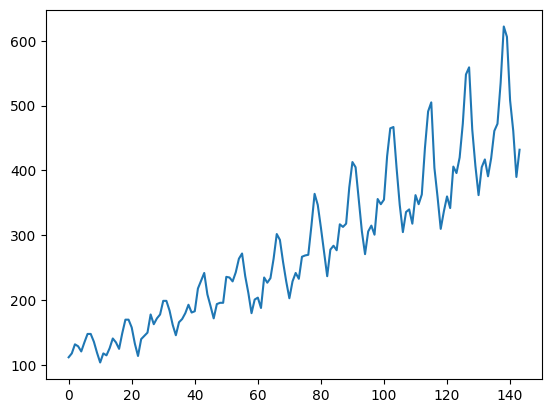

In [10]:
plt.plot(data)
plt.show()

In [11]:
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

In [12]:
len(data)

144

In [13]:
train=data[0:100,:]
test=data[100:,:]

In [14]:
def get_data(data,steps):
    dataX=[]
    dataY=[]
    for i in range(len(data)-steps-1):
        a=data[i:(i+steps),0]
        dataX.append(a)
        dataY.append(data[i+steps,0])
    return np.array(dataX),np.array(dataY)

In [15]:
steps=2

In [16]:
x_train,y_train=get_data(train,steps)
x_test,y_test=get_data(test,steps)

In [17]:
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [18]:
model=Sequential()
model.add(LSTM(128,input_shape=(1,steps)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75393 (294.50 KB)
Trainable params: 75393 (294.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.fit(x_train,y_train,epochs=25,batch_size=1)

Epoch 1/25

97/97 [==============================] - 2s 3ms/step - loss: 0.0081
Epoch 2/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 3/25
97/97 [==============================] - 1s 8ms/step - loss: 0.0033
Epoch 4/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 6/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 7/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 8/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 9/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 10/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 11/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 12/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 13/25
97/97 [=============================

In [22]:
y_predict=model.predict(x_test)

2/2 [==============================] - 1s 3ms/step


In [23]:
y_predict=scaler.inverse_transform(y_predict)
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)

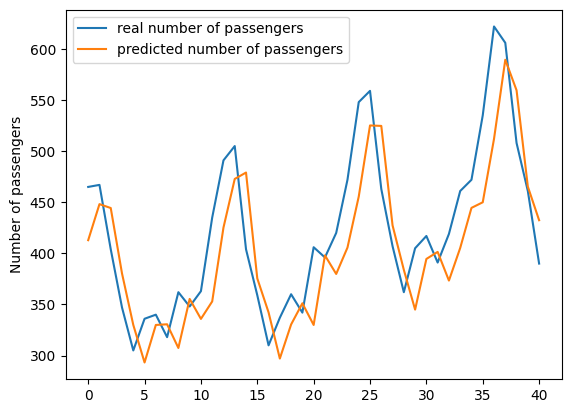

In [25]:
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_predict, label = 'predicted number of passengers')
plt.ylabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()